# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Javier, Michael Adrian M.\
_Student No._: 2019-04177\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Michael Adrian Javier

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('spec4000_corrected.npz')
plt.rcParams["font.family"] = "Arial"

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [4]:
data.files

['spec_recons', 'wavelength']

In [5]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

In [6]:
import pandas as pd

pd.DataFrame(data['spec_recons'])

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.920128,5.166237,6.073041,6.135668,5.920208,6.561038,5.071048,5.901859,6.038696,5.820622,...,8.393729,8.024036,8.561415,8.434849,8.597162,8.344885,8.907126,7.509330,7.970523,7.984391
1,2.189293,2.186866,2.184458,2.182061,2.866722,2.805367,2.174843,2.115526,2.204962,2.342030,...,13.340747,13.198367,13.232717,13.266667,13.090606,13.066720,12.839167,12.837092,12.934673,12.810533
2,2.745135,2.738469,3.368032,3.217042,3.441880,3.687229,2.793172,3.174353,3.186890,3.210912,...,10.021246,9.908648,9.955985,10.244089,9.782692,11.257375,8.749062,9.290792,9.108875,8.385379
3,3.157695,3.394861,4.296070,3.674411,4.581087,4.633624,3.451835,3.545794,3.726416,3.915776,...,22.398006,21.411480,21.953152,21.155659,21.920168,21.504097,19.942957,20.881233,20.432819,19.751265
4,1.456530,1.511022,2.063326,1.585510,2.108591,2.171321,1.534262,1.612093,1.783922,1.866496,...,10.302826,10.195320,10.219833,10.287531,10.136375,10.049644,9.778271,10.630739,9.073994,9.437379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.566501,0.806633,1.078575,1.142745,1.408041,1.539500,0.789904,0.779375,0.790446,1.021665,...,6.021113,6.180089,5.779444,5.468583,6.208807,5.352884,6.046436,5.509343,5.549700,5.588080
3996,1.516849,3.168352,2.308541,3.285917,2.652673,0.969830,2.547793,2.168796,3.537405,2.347333,...,6.803461,6.717976,6.740576,6.766204,6.655971,6.661380,6.524184,6.522043,6.557480,6.498815
3997,1.772032,2.030068,2.236027,2.156615,2.340729,2.315020,1.979210,1.944517,2.108420,2.068026,...,5.770639,5.833852,5.883630,5.887005,5.761838,5.827677,6.377102,4.777608,7.063931,5.797799
3998,4.498378,5.072573,5.667263,5.853247,6.204665,6.194448,5.075573,5.194005,5.122931,5.267116,...,20.002645,20.556625,21.015553,20.358269,20.290157,20.935774,21.802231,21.518795,19.828224,20.714499


Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
data['spec_recons'][0]

array([ 4.9201283,  5.1662374,  6.073041 ,  6.1356683,  5.9202085,
        6.5610385,  5.071048 ,  5.9018593,  6.0386963,  5.820622 ,
        6.0445285,  6.040166 ,  6.3441415,  6.594683 ,  6.885506 ,
        6.996833 ,  7.2302847,  7.083025 ,  7.214896 ,  6.9971867,
        7.469544 ,  7.2053347,  7.522149 ,  6.3616567,  6.7839704,
        7.124962 ,  7.728558 ,  7.260755 ,  7.9420376,  7.5423126,
        7.419989 ,  7.9940557,  7.836619 ,  8.226736 ,  8.463833 ,
        8.550379 ,  8.352997 ,  8.756934 ,  8.802845 ,  8.660986 ,
        8.503768 ,  8.650667 ,  8.579723 ,  8.703736 ,  9.412664 ,
        9.225246 ,  9.940674 ,  9.809005 ,  9.391509 ,  9.482529 ,
        9.099832 ,  8.862202 , 10.198295 ,  9.451311 ,  9.407943 ,
        9.485785 ,  9.391434 ,  8.869375 ,  8.699637 ,  9.518878 ,
        9.02702  , 10.040443 ,  9.379565 ,  8.9065485, 10.044757 ,
        9.749434 ,  9.14177  ,  9.102036 ,  9.722941 ,  8.669742 ,
        8.427573 ,  9.178286 ,  8.843887 ,  9.08874  ,  9.2930

Text(0.5, 1.0, 'Sample SDSS spectra')

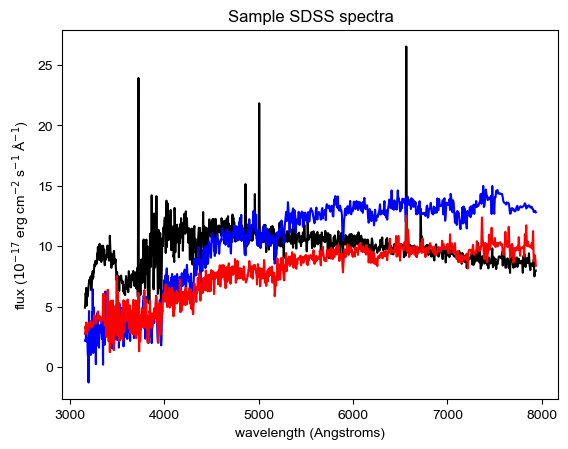

In [9]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

In [10]:
len(flux0)

1000

In [11]:
print(wavelength)

[3162.27766017 3165.19156723 3168.10815933 3171.02743895 3173.94940856
 3176.87407065 3179.80142769 3182.73148217 3185.66423657 3188.59969339
 3191.5378551  3194.47872421 3197.4223032  3200.36859459 3203.31760085
 3206.26932451 3209.22376805 3212.18093399 3215.14082483 3218.10344309
 3221.06879128 3224.03687192 3227.00768752 3229.9812406  3232.95753368
 3235.9365693  3238.91834997 3241.90287823 3244.89015661 3247.88018764
 3250.87297385 3253.8685178  3256.86682202 3259.86788904 3262.87172143
 3265.87832172 3268.88769247 3271.89983623 3274.91475556 3277.932453
 3280.95293113 3283.9761925  3287.00223969 3290.03107525 3293.06270175
 3296.09712177 3299.13433789 3302.17435267 3305.2171687  3308.26278856
 3311.31121483 3314.36245009 3317.41649695 3320.47335798 3323.53303577
 3326.59553294 3329.66085207 3332.72899576 3335.79996662 3338.87376725
 3341.95040026 3345.02986826 3348.11217386 3351.19731968 3354.28530833
 3357.37614243 3360.46982461 3363.56635748 3366.66574369 3369.76798584
 3372.87

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Normalized SDSS spectra')

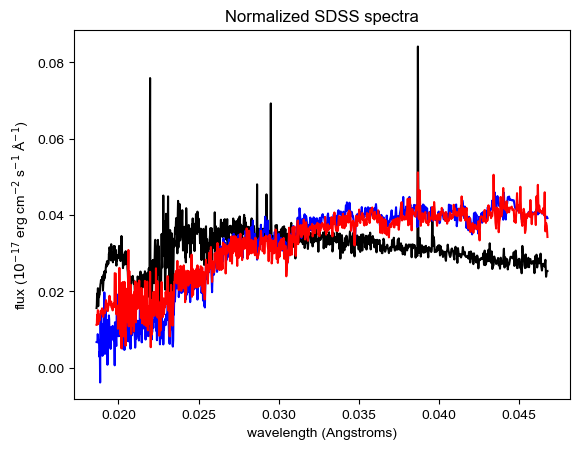

In [12]:
from sklearn.preprocessing import normalize

wave_flux0 = normalize(np.array([wavelength, flux0]))
wave_flux1 = normalize(np.array([wavelength, flux1]))
wave_flux2 = normalize(np.array([wavelength, flux2]))

plt.plot(wave_flux0[0], wave_flux0[1], 'k')
plt.plot(wave_flux1[0], wave_flux1[1], 'b')
plt.plot(wave_flux2[0], wave_flux2[1], 'r')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Normalized SDSS spectra")

Text(0, 0.5, 'Flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')

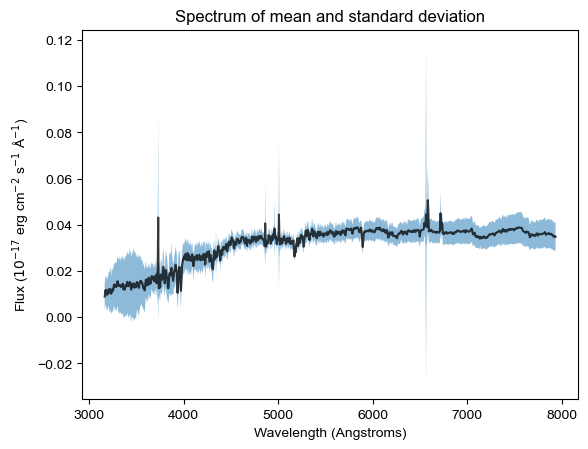

In [13]:
norm_flux = normalize(data['spec_recons'], axis=1, norm='l2') # axis=1 kasi we want to take each sample, not feature
mean_flux = np.mean(norm_flux, axis=0)
std_flux = np.std(norm_flux, axis=0)
plt.plot(wavelength, mean_flux, alpha=0.75, color='k')
#plt.plot(wavelength, std_flux, 'k--', label='STD')
plt.fill_between(wavelength, mean_flux-std_flux, mean_flux+std_flux, alpha=0.5) # shaded plot instead of error bars
plt.title('Spectrum of mean and standard deviation')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel("Flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [14]:
from sklearn.decomposition import PCA

The data probably has 1000 components, but we only consider the 4 principal components (4 most important linear combination of all the components)

In [15]:
n_comp = 4
pca = PCA(n_components=n_comp)

We then fit the data using the `PCA` class

In [16]:
pca.fit(norm_flux)  

PCA(n_components=4)

In [17]:
simple_flux = pca.transform(norm_flux)

In [18]:
simple_flux.shape

(4000, 4)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

`simple_flux` gives an array composed of 4 1 $\times$ 1000 arrays. We can plot the first two principal components by taking `simple_flux[:, 0]` and `simple_flux[:, 0]`.

Text(0.5, 1.0, "Plot of first two PC's")

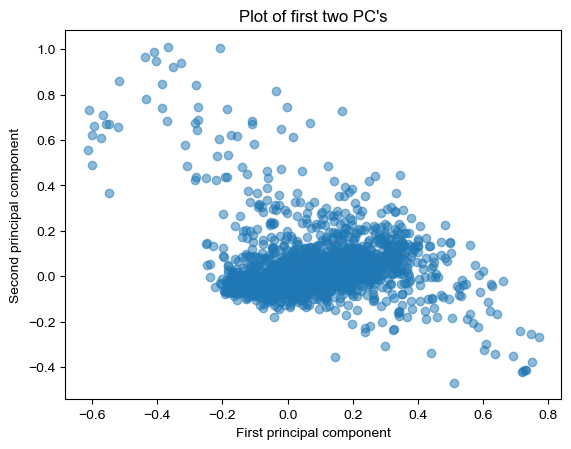

In [19]:
plt.scatter(simple_flux[:, 0], simple_flux[:, 1], alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title("Plot of first two PC's")

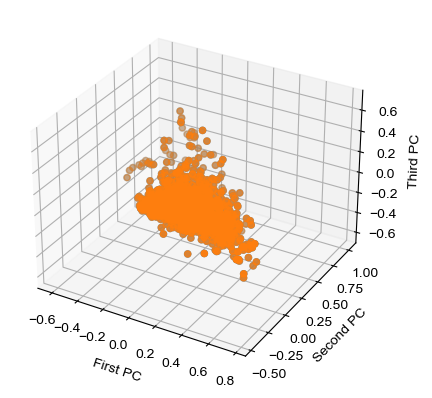

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for m, zlow, zhigh in [('o', -50, -25), ('o', -30, -5)]:
    xs = simple_flux[:, 0]
    ys = simple_flux[:, 1]
    zs = simple_flux[:, 2]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')

plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

The eigenvectors and the eigenvalues of the covariant matrix can be obtained from using the PCA class. The PCA class has an option of `components_` and `explained_variances_`, and those are the eigenvectors and eigenvalues respectively.

In [21]:
eigvec = pca.components_
eigval = pca.explained_variance_

Let's see if we did okay. `eigvec` should have 4 1 $\times$ 1000 arrays while `eigval` should be a 1 $\times$ 4 array because we have four eigenvalues.

In [22]:
print(eigvec.shape, eigval.shape)

(4, 1000) (4,)


Plotting them with the mean spectrum, we see that:

([], [])

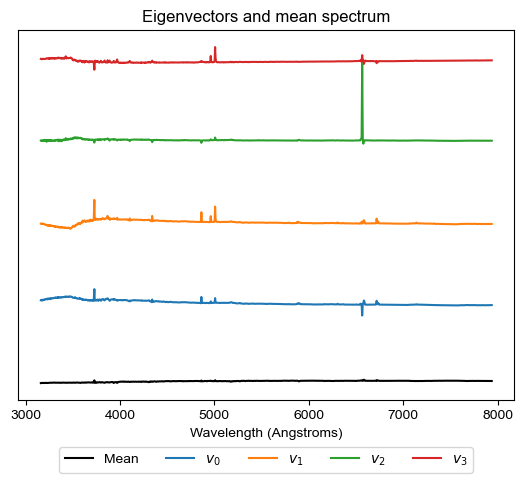

In [23]:
plt.plot(wavelength, mean_flux, label = 'Mean', color='k')
for i in range(4):
    plt.plot(wavelength, eigvec[i, :] + (i+1), label='$v_{exp}$'.format(exp=i))
plt.legend(loc='upper center', ncol=5, fancybox=True, bbox_to_anchor=(0.5,-0.11))
plt.xlabel('Wavelength (Angstroms)')
plt.title('Eigenvectors and mean spectrum')
plt.yticks([])

Now, we remember that the previous module A2 had a lot of features (16), and even though we have reduced them to 13, a lot of those components would still be redundant. Let's try to reduce it to 4.

Let's load in the data first.

In [24]:
galaxy = np.load('galaxy_catalogue.npy')
data_df = pd.DataFrame(galaxy)

r_5090u = data_df.iloc[:, 10]/data_df.iloc[:, 13]
r_5090r = data_df.iloc[:, 11]/data_df.iloc[:, 14]
r_5090z = data_df.iloc[:, 12]/data_df.iloc[:, 15]

data_features = data_df.drop(columns=['petroR50_u', 'petroR50_r', 'petroR50_z', 'petroR90_u', 'petroR90_r', 'petroR90_z', 'class'])
data_features['R5090_u'] = r_5090u
data_features['R5090_r'] = r_5090r
data_features['R5090_z'] = r_5090z

In [25]:
galaxy = np.load('galaxy_catalogue.npy')
data_df = pd.DataFrame(galaxy)

data_features = data_df.iloc[:, :16]
data_class = data_df.iloc[:, 16]

In [26]:
data_features

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,13.877220,11.936910,11.337210,32.374710,25.266770,25.934250
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,3.032364,3.348147,3.062732,5.833694,8.061935,7.840197
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,4.652165,4.031008,3.122812,9.610085,9.280005,6.708179
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,5.442954,4.227347,3.774427,16.256520,7.738220,7.865478


In [54]:
pd.DataFrame(data_class)

,class
0,merger
1,merger
2,merger
3,merger
4,merger
...,...
775,spiral
776,spiral
777,spiral
778,spiral


In [28]:
norm_features = normalize(data_features, axis=1)
pca_gal = PCA(n_components=4)

However, we actually don't need to fit and then transform the data, we can use the function `fit_transform` which does these immediately. 

In [29]:
simple_gal = pca_gal.fit_transform(norm_features)

In [49]:
sim_gal_df = pd.DataFrame(simple_gal, columns=['Principal component 1', 'Principal component 2', 'Principal component 3', \
                                               'Principal component 4'])

Let's try to plot the first two principal components mapping the targets:
- merger
- spiral
- elliptical

In [55]:
target_names = {
    0:'elliptical',
    1:'spiral', 
    2:'merger'
}

sim_gal_df['target'] = data_class
# sim_gal_df['target'] = sim_gal_df['target'].map(target_names)

In [56]:
sim_gal_df

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,target
0,0.078217,-0.162021,-0.166373,-0.067286,merger
1,0.050337,-0.262277,0.233358,-0.025892,merger
2,-0.016447,-0.051231,-0.044310,-0.109522,merger
3,0.006652,-0.029488,-0.115112,-0.044915,merger
4,-0.026136,-0.014438,0.056602,0.019567,merger
...,...,...,...,...,...
775,-0.085813,0.186836,-0.056119,0.016563,spiral
776,0.024659,-0.137002,-0.064720,0.015591,spiral
777,-0.055857,0.006364,0.063160,0.090378,spiral
778,-0.126545,0.177468,0.203396,-0.003997,spiral


In [62]:
sim_gal_df.iloc[:, 4]

0      merger
1      merger
2      merger
3      merger
4      merger
        ...  
775    spiral
776    spiral
777    spiral
778    spiral
779    spiral
Name: target, Length: 780, dtype: object

Plotting these out with the colors:
- blue: elliptical
- red: spiral
- green: merger

Text(0, 0.5, 'Principal component 1')

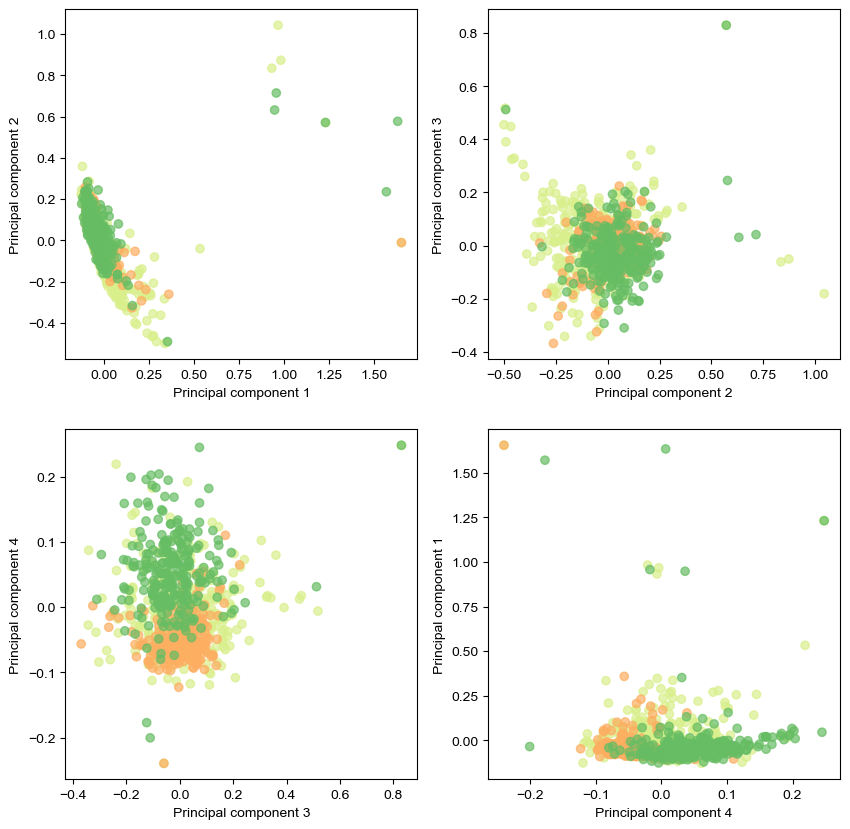

In [78]:
gal_color = {'elliptical':'#FDAE61', 'spiral':'#66BD63', 'merger':'#D9EF8B'}

plt.figure(figsize=[10, 10])
plt.subplot(2, 2, 1)
plt.scatter(sim_gal_df.iloc[:, 0], sim_gal_df.iloc[:, 1], color=sim_gal_df.iloc[:, 4].map(gal_color), alpha=0.7)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(2, 2, 2)
plt.scatter(sim_gal_df.iloc[:, 1], sim_gal_df.iloc[:, 2], color=sim_gal_df.iloc[:, 4].map(gal_color), alpha=0.7)
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')

plt.subplot(2, 2, 3)
plt.scatter(sim_gal_df.iloc[:, 2], sim_gal_df.iloc[:, 3], color=sim_gal_df.iloc[:, 4].map(gal_color), alpha=0.7)
plt.xlabel('Principal component 3')
plt.ylabel('Principal component 4')

plt.subplot(2, 2, 4)
plt.scatter(sim_gal_df.iloc[:, 3], sim_gal_df.iloc[:, 0], color=sim_gal_df.iloc[:, 4].map(gal_color), alpha=0.7)
plt.xlabel('Principal component 4')
plt.ylabel('Principal component 1')


We see that the principal components actually maximize the variation within their perspective axes! 

Getting the eigenvectors and the eigenvalues, 

In [30]:
eigvec = pca_gal.components_
eigval = pca_gal.explained_variance_

We can check the cumulative sum of all of the variance ratios and see that 4 principal components already contribute to 87.42% of the variance, which means that these 4 principal components more than makes up for the data. 

Text(0.75, 92, 'Maximum % contribution = 87.42%')

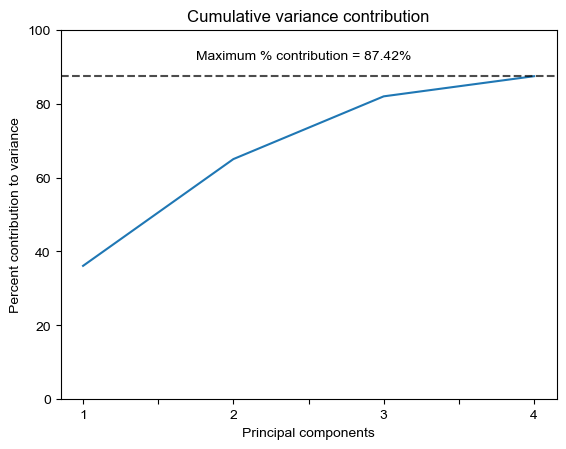

In [39]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
percent_var = np.cumsum(pca_gal.explained_variance_ratio_)*100
max_contri = np.max(percent_var)

ax.plot(percent_var)
ax.set_xlabel('Principal components')
ax.set_ylabel('Percent contribution to variance')
ax.set_ylim([0, 100])
ax.axhline(max_contri, xmin=0, xmax=3, linestyle='--', color='k', alpha=0.7)
def update_ticks(x, pos):
    if x==0:
        return '1'
    elif x==1:
        return '2'
    elif x==2:
        return '3'
    elif x==3:
        return '4'
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
ax.set_title('Cumulative variance contribution')
ax.text(0.75, 92, 'Maximum % contribution = {max}%'.format(max=round(max_contri, 2)))

Let's print out the 3rd eigenvector:

In [73]:
eigvec[2]

array([ 0.14969658,  0.08318323,  0.03999027,  0.01667848,  0.06607982,
        0.20573924,  0.20830215,  0.20911834,  0.21472192,  0.19387472,
        0.06523593, -0.17538574, -0.28117129,  0.35533045, -0.44953851,
       -0.5557589 ])

and we see that it is composed of:

$$ \begin{align}
    \vec{x}_2 &= 0.14969658\ \text{(u-g)} + 0.08318323\ \text{(g-r)} + 0.03999027\ \text{(r-i)} + 0.01667848\ \text{(i-z)} \\
    & + 0.06607982\ \text{ecc} + 0.20573924\ \text{m4\_u} + 0.20830215\ \text{m4\_g} + 0.20911834\ \text{m4\_r} \\
    & + 0.21472192\ \text{m4\_i} + 0.19387472\ \text{m4\_z} + 0.06523593\ \text{petroR50\_u} -0.17538574\ \text{petroR50\_r} \\
    & -0.28117129\ \text{petroR50\_z} + 0.35533045\ \text{petroR90\_u} -0.44953851\ \text{petroR90\_r} -0.5557589\ \text{petroR90\_z}
\end{align} $$ 